Image dim: 70200 x 32083


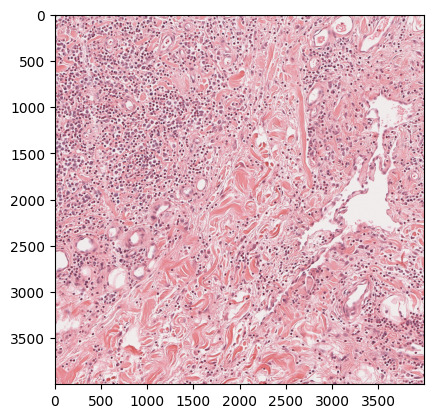

In [1]:
import os
import openslide
import matplotlib.pyplot as plt
image_path = os.path.join(os.getcwd(), "P23-5346A.svs")
slide = openslide.OpenSlide(image_path)
width, height = slide.dimensions
print(f"Image dim: {width} x {height}")
block = (4000 , 4000)
x_block = (width - block[0]) // 2
y_block = (height - block[1]) // 2
block = slide.read_region((x_block, y_block), 0, block)
block = block.convert("RGB")
plt.imshow(block)
plt.show()

Intentemos usar la imagen en escala de grises para simplificar la imagen

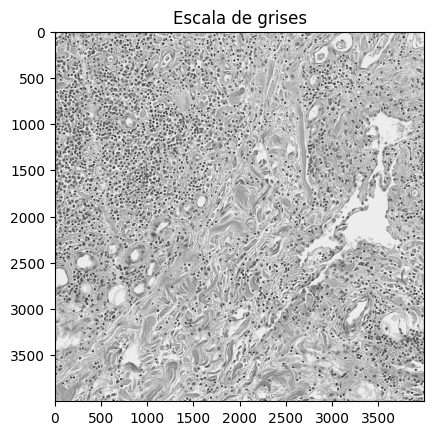

In [2]:
import cv2
import numpy as np

# Convertir el bloque de imagen a un array de NumPy para procesamiento
block_array = np.array(block)

# Convertir a escala de grises
block_gray = cv2.cvtColor(block_array, cv2.COLOR_RGB2GRAY)

plt.imshow(block_gray, cmap="gray")
plt.title("Escala de grises")
plt.show()

Hacemos equalizacion con histograma para mejorar la diferencia entre las regiones de interés y el resto de la imagen

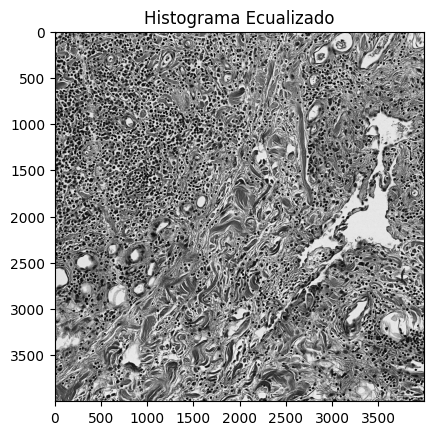

In [3]:
# Ecualización del histograma
block_eq = cv2.equalizeHist(block_gray)

plt.imshow(block_eq, cmap="gray")
plt.title("Histograma Ecualizado")
plt.show()

Filtramos el ruido de la imagen y suavizamos

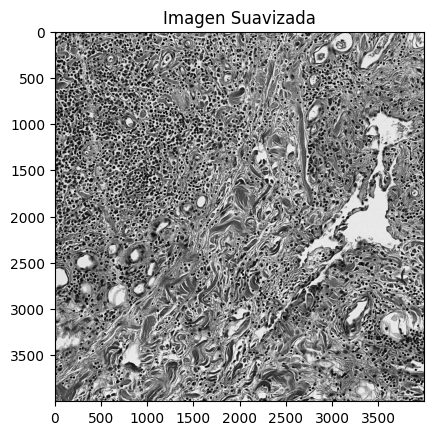

In [4]:
# Aplicar filtro Gaussiano para suavizar la imagen
block_blur = cv2.GaussianBlur(block_eq, (5, 5), 0)

plt.imshow(block_blur, cmap="gray")
plt.title("Imagen Suavizada")
plt.show()

Configurar detector de blobs

In [7]:
# Configuración del detector de blobs
params = cv2.SimpleBlobDetector_Params()

# Detectar blobs oscuros (negros)
params.filterByColor = True
params.blobColor = 0  # Detectar blobs oscuros

# Ajustar el área mínima para evitar blobs demasiado pequeños
params.filterByArea = True
params.minArea = 20  # Aumentar el área mínima para reducir falsos positivos
params.maxArea = 800  # Mantener el límite superior

# Ajustar circularidad para detectar formas más redondeadas
params.filterByCircularity = True
params.minCircularity = 0.6  # Más estricta para mejorar la precisión

# Distancia mínima entre blobs para evitar detecciones redundantes
params.minDistBetweenBlobs = 1  # Valor mínimo válido para blobs cercanos

# Desactivar el filtro de elongación
params.filterByInertia = False  # No aplicar restricciones por elongación

# Crear detector con los parámetros ajustados
blob_detector = cv2.SimpleBlobDetector_create(params)

Detectar blobs

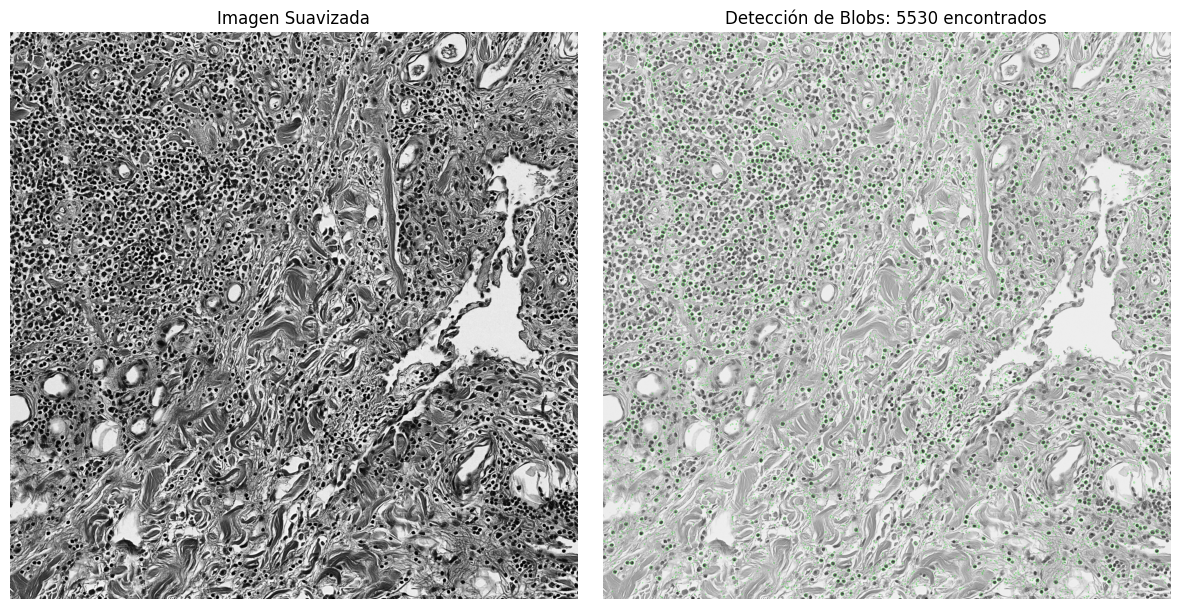

In [10]:
# Detectar blobs en la imagen suavizada
keypoints = blob_detector.detect(block_blur)

# Dibujar blobs detectados con un grosor de línea más grande
output_image = cv2.drawKeypoints(
    block_gray, 
    keypoints, 
    None, 
    (0, 255, 0),  # Color verde para los blobs
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS  # Opciones de dibujo
)

# Mostrar resultados
plt.figure(figsize=(12, 6))

# Imagen suavizada
plt.subplot(1, 2, 1)
plt.imshow(block_blur, cmap="gray")
plt.title("Imagen Suavizada")
plt.axis("off")

# Imagen con blobs detectados con mayor grosor
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title(f"Detección de Blobs: {len(keypoints)} encontrados")
plt.axis("off")

plt.tight_layout()
plt.show()
